# Problem Define and Proposed Solution
Football clubs often make large financial investments in players, with high-profile transfers costing millions. However, these investments do not always lead to the expected success. The aim of this project is to develop a **predictive model** that estimates football player wages based on player attributes, allowing clubs to make more informed decisions and reduce financial risk.

The project’s goal is to build a model that predicts **football player wages** based on various attributes, including performance, physical characteristics, and reputation. This model will provide valuable insights to help clubs:
- **Optimize budget allocation** by predicting the wages of prospective signings.
- **Improve contract negotiations** by offering data-driven insights into player value.
- **Mitigate the risk** of costly transfer mistakes by providing more accurate wage estimates.

To achieve this, we will implement two machine learning models: 
- **Random Forest Regressor (RF)**: A robust ensemble method that handles non-linear data well and provides feature importance.
- **Support Vector Regression (SVR)**: A flexible model using kernels to capture complex relationships in the data.

# Import libraries 

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

# Import Dataset

In [3]:
# Load the dataset
df = pd.read_csv('fifa_players.csv')

In [4]:
df.head()

,name,full_name,birth_date,age,height_cm,weight_kgs,positions,nationality,overall_rating,potential,...,long_shots,aggression,interceptions,positioning,vision,penalties,composure,marking,standing_tackle,sliding_tackle
0,L. Messi,Lionel Andrés Messi Cuccittini,6/24/1987,31,170.18,72.1,"CF,RW,ST",Argentina,94,94,...,94,48,22,94,94,75,96,33,28,26
1,C. Eriksen,Christian Dannemann Eriksen,2/14/1992,27,154.94,76.2,"CAM,RM,CM",Denmark,88,89,...,89,46,56,84,91,67,88,59,57,22
2,P. Pogba,Paul Pogba,3/15/1993,25,190.50,83.9,"CM,CAM",France,88,91,...,82,78,64,82,88,82,87,63,67,67
3,L. Insigne,Lorenzo Insigne,6/4/1991,27,162.56,59.0,"LW,ST",Italy,88,88,...,84,34,26,83,87,61,83,51,24,22
4,K. Koulibaly,Kalidou Koulibaly,6/20/1991,27,187.96,88.9,CB,Senegal,88,91,...,15,87,88,24,49,33,80,91,88,87


# Data Exporation

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17954 entries, 0 to 17953
Data columns (total 51 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   name                           17954 non-null  object 
 1   full_name                      17954 non-null  object 
 2   birth_date                     17954 non-null  object 
 3   age                            17954 non-null  int64  
 4   height_cm                      17954 non-null  float64
 5   weight_kgs                     17954 non-null  float64
 6   positions                      17954 non-null  object 
 7   nationality                    17954 non-null  object 
 8   overall_rating                 17954 non-null  int64  
 9   potential                      17954 non-null  int64  
 10  value_euro                     17699 non-null  float64
 11  wage_euro                      17708 non-null  float64
 12  preferred_foot                 17954 non-null 

In [5]:
# List of numeric columns (integers, floats)
numeric_columns = df.select_dtypes(include=['number']).columns.tolist()

# List of categorical columns (strings, objects, categories)
categorical_columns = df.select_dtypes(include=['object', 'category']).columns.tolist()

# Print the lists
print("Numeric Columns:", numeric_columns)
print("Categorical Columns:", categorical_columns)

Numeric Columns: ['age', 'height_cm', 'weight_kgs', 'overall_rating', 'potential', 'value_euro', 'wage_euro', 'international_reputation(1-5)', 'weak_foot(1-5)', 'skill_moves(1-5)', 'release_clause_euro', 'national_rating', 'national_jersey_number', 'crossing', 'finishing', 'heading_accuracy', 'short_passing', 'volleys', 'dribbling', 'curve', 'freekick_accuracy', 'long_passing', 'ball_control', 'acceleration', 'sprint_speed', 'agility', 'reactions', 'balance', 'shot_power', 'jumping', 'stamina', 'strength', 'long_shots', 'aggression', 'interceptions', 'positioning', 'vision', 'penalties', 'composure', 'marking', 'standing_tackle', 'sliding_tackle']
Categorical Columns: ['name', 'full_name', 'birth_date', 'positions', 'nationality', 'preferred_foot', 'body_type', 'national_team', 'national_team_position']


### Overview of the Dataset:

The dataset consists of 49 input variables, including 9 categorical variables and 40 numerical variables. These variables are grouped into categories to facilitate easier analysis and better understanding of player characteristics. 

1. **Player Identification and Personal Information**:
   - **name**: Name of the player.
   - **full_name**: Full name of the player.
   - **birth_date**: Date of birth of the player.
   - **age**: Age of the player.
   - **height_cm**: Player's height in centimeters.
   - **weight_kgs**: Player's weight in kilograms.
   - **nationality**: Player's nationality.
   - **body_type**: Player's body type.

2. **Player Position and Role**:
   - **positions**: Positions the player can play.
   - **national_team_position**: Position in the national team.
   - **national_team**: National team of the player.
   - **national_jersey_number**: Jersey number in the national team.

3. **Player Performance and Reputation Ratings**:
   - **overall_rating**: Overall rating of the player in FIFA.
   - **potential**: Potential rating of the player in FIFA.
   - **international_reputation (1-5)**: International reputation rating from 1 to 5.
   - **national_rating**: Rating in the national team.

4. **Financial Information**:
   - **value_euro**: Market value of the player in euros.
   - **wage_euro**: Weekly wage of the player in euros.
   - **release_clause_euro**: Release clause of the player in euros.

5. **Technical Attributes (Skill-Based)**:
   - **crossing**: Ability to deliver accurate crosses into the box.
   - **finishing**: Ability to score goals in 1-on-1 situations or from shots.
   - **heading_accuracy**: Accuracy of heading the ball.
   - **short_passing**: Accuracy in short passing.
   - **volleys**: Ability to score from volleyed shots.
   - **dribbling**: Ability to maneuver with the ball past opponents.
   - **curve**: Ability to bend the ball, particularly for shots and crosses.
   - **freekick_accuracy**: Accuracy of free kicks.
   - **long_passing**: Ability to make accurate long-range passes.
   - **ball_control**: Ability to control the ball upon receiving it.

6. **Physical Attributes (Athleticism)**:
   - **acceleration**: Speed in getting to maximum pace.
   - **sprint_speed**: Maximum speed while running.
   - **agility**: Ability to change direction quickly.
   - **reactions**: Speed of response to events on the field.
   - **balance**: Ability to maintain stability while running, shooting, or passing.
   - **jumping**: Ability to jump for headers or aerial challenges.
   - **stamina**: Endurance to perform throughout the match.
   - **strength**: Physical power to hold off opponents and maintain possession.

7. **Attacking Attributes**:
   - **shot_power**: Power behind a player’s shot.
   - **long_shots**: Ability to shoot effectively from long distance.
   - **positioning**: Ability to be in the right place during offensive plays.
   - **vision**: Ability to spot opportunities for through balls or long passes.
   - **penalties**: Accuracy in taking penalties.

8. **Defensive Attributes**:
   - **standing_tackle**: Ability to dispossess opponents through standing tackles.
   - **sliding_tackle**: Effectiveness in sliding tackles to win the ball.
   - **interceptions**: Ability to read the game and intercept passes.
   - **marking**: Ability to stay close to and limit the effectiveness of opposing players.

9. **Mental Attributes**:
   - **composure**: Ability to remain calm under pressure.
   - **aggression**: Willingness to press and tackle opponents, displaying intensity in play.

10. **Special Skills**:
   - **preferred_foot**: Player's dominant foot (right or left).
   - **weak_foot (1-5)**: Ability to use the weaker foot for passing and shooting.
   - **skill_moves (1-5)**: Proficiency in performing skill moves like tricks and dribbles.



### Univariate analysis

In [6]:
pip install ydata-profiling

In [63]:
from ydata_profiling import ProfileReport

# Generate the profiling report
profile = ProfileReport(df, title="Pandas Profiling Report", explorative=True)

# Save the report as an HTML file
profile.to_file("output_report.html")

# Optionally, open it directly in the browser
import webbrowser
webbrowser.open("output_report.html")

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

Export report to file:   0%|          | 0/1 [00:00<?, ?it/s]

True

### Key Findings of Univariate Analysis:

**Target Variable (Wage)**:
- **Range**: Weekly wages of football players vary significantly, ranging from 1,000 to 565,000 euros.
- **Median Wage**: The median wage is 3,000 euros, highlighting the wide disparity in player salaries globally.
- **Missing Values**: The wage variable has 1.4% missing data, which should be addressed during the data cleaning process.
- **Distribution**: The wage distribution is strongly right-skewed, indicating the need for transformation (e.g., log transformation) before model building to ensure better predictive performance.

These findings emphasize the need to handle skewness and missing data appropriately to improve model accuracy.

**Input Variables Overview**:

The dataset consists mostly of numeric ratings on a 1 to 100 scale, with **international_reputation**, **weak_foot**, and **skill_moves** rated on a 1 to 5 scale. The variables are grouped into smaller categories for easier analysis:

1. **Player Position and Role**: Includes variables like **national_team_position**, **national_team**, and **national_jersey_number**, which have over 80% missing values and should be considered for removal during data cleaning.
   
2. **Player Performance and Reputation Ratings**: **overall_rating** and **potential** have normal distributions, with mean scores of 66 and 71, respectively. **national_rating** has a high percentage of missing values.

3. **Technical Attributes**: Includes skills like **crossing** and **dribbling**, rated on a 1 to 100 scale, providing insight into player abilities.

4. **Physical Attributes**: Variables like **acceleration**, **stamina**, and **sprint_speed** assess a player's physical abilities.

5. **Attacking and Defensive Attributes**: Focus on offensive and defensive skills such as **finishing**, **shot_power**, **standing_tackle**, and **marking**.

6. **Mental and Special Skills**: **composure**, **aggression**, and attributes like **preferred_foot** and **skill_moves** provide insights into a player’s mental and technical abilities.




### Bivariate analysis

In [8]:
def plot_top_players_wages(df, x_column, y_column, top_n=30):
    """
    Function to plot top players by a given x_column and y_column.

    Parameters:
    df (DataFrame): The DataFrame containing player data.
    x_column (str): The column name to be plotted on the x-axis (e.g., 'wage_euro').
    y_column (str): The column name to be plotted on the y-axis (e.g., 'full_name').
    top_n (int): The number of top players to display (default is 30).
    """
    # Sort by top wage and select top players (default: top 30)
    top_players = df.sort_values(by='wage_euro', ascending=False).head(top_n)
    
    # Create the plot
    plt.figure(figsize=(10, 6))
    
    # Use seaborn to create the bar plot
    sns.barplot(x=x_column, y=y_column, data=top_players, palette='viridis')
    
    # Add title and labels
    plt.title(f'Top {top_n} Players by {x_column.capitalize()} and {y_column.capitalize()}', fontsize=8)
    plt.xlabel(x_column.replace('_', ' ').capitalize(), fontsize=8)
    plt.ylabel(y_column.replace('_', ' ').capitalize(), fontsize=8)
    
    # Display the plot
    plt.tight_layout()
    plt.show()

C:\Users\votua\AppData\Local\Temp\ipykernel_35920\3016021191.py:18: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=x_column, y=y_column, data=top_players, palette='viridis')


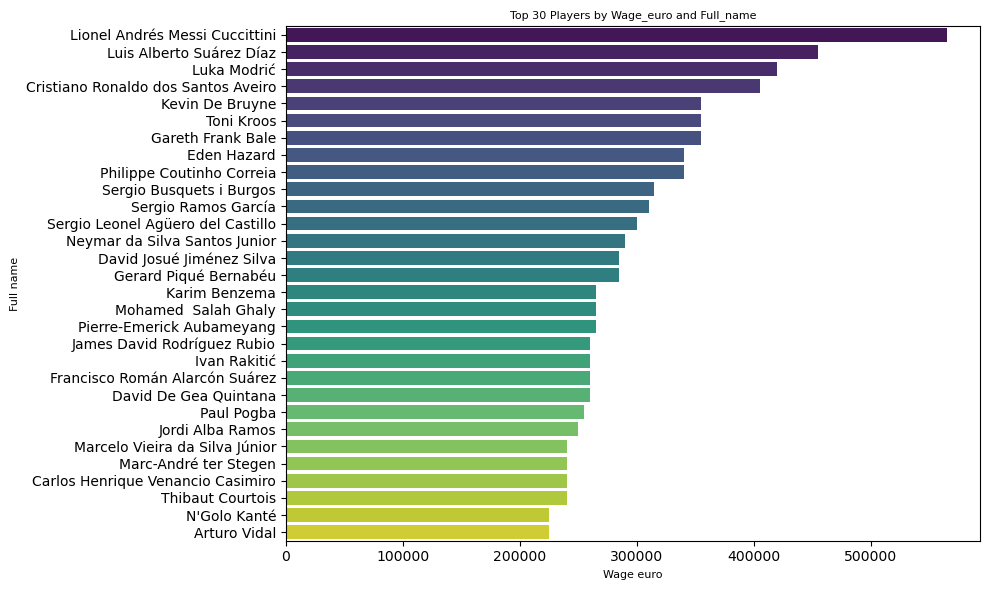

C:\Users\votua\AppData\Local\Temp\ipykernel_35920\3016021191.py:18: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=x_column, y=y_column, data=top_players, palette='viridis')


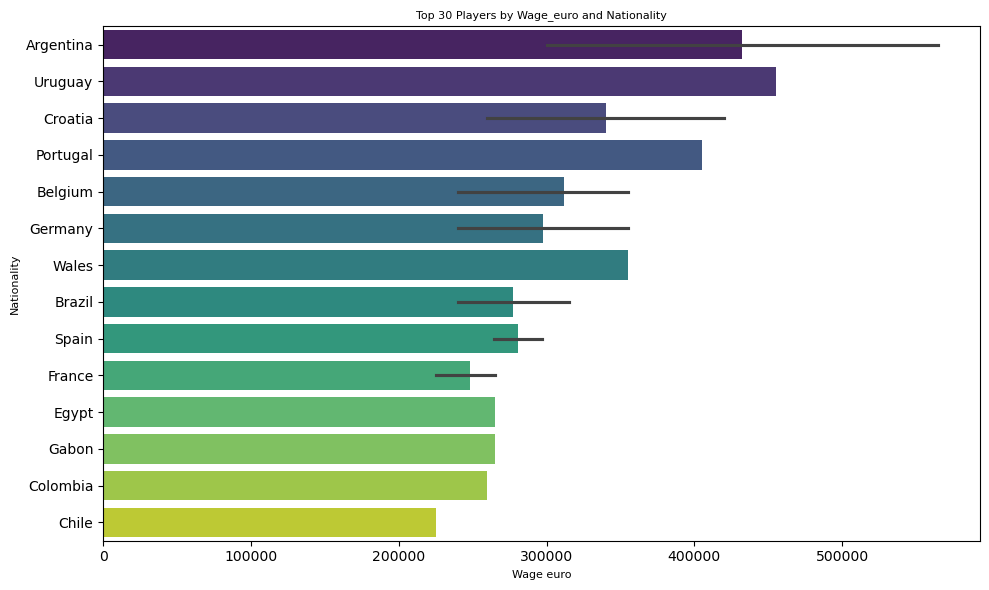

In [9]:
# Plot Wage by Player Name
plot_top_players_wages(df, 'wage_euro', 'full_name', top_n=30)

# Plot Wage by Nationality
plot_top_players_wages(df, 'wage_euro', 'nationality', top_n=30)


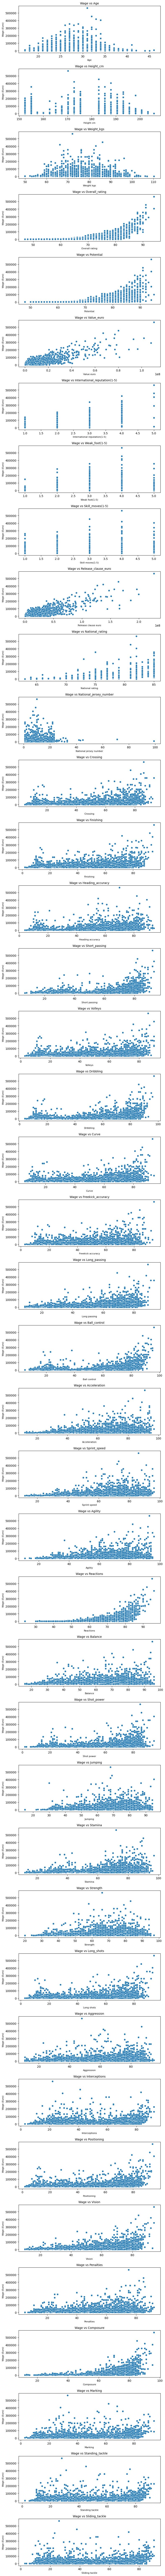

In [10]:
import matplotlib.pyplot as plt
import seaborn as sns

# List of numeric columns (integers, floats)
numeric_columns = df.select_dtypes(include=['number']).columns.tolist()

# Remove 'wage_euro' from the list since we're comparing other variables against it
numeric_columns.remove('wage_euro')

# Create a figure with subplots for each numeric column, adjusting for smaller charts
fig, axes = plt.subplots(len(numeric_columns), 1, figsize=(8, len(numeric_columns) * 3))

# Loop through each numeric column and create a subplot
for i, col in enumerate(numeric_columns):
    sns.scatterplot(x=col, y='wage_euro', data=df, ax=axes[i])
    
    # Add title and labels
    axes[i].set_title(f'Wage vs {col.capitalize()}', fontsize=10)
    axes[i].set_xlabel(col.replace('_', ' ').capitalize(), fontsize=8)
    axes[i].set_ylabel('Wage (Euro)', fontsize=8)

# Adjust layout to prevent overlap
plt.tight_layout()

# Show all plots
plt.show()


### Multivariate analysis

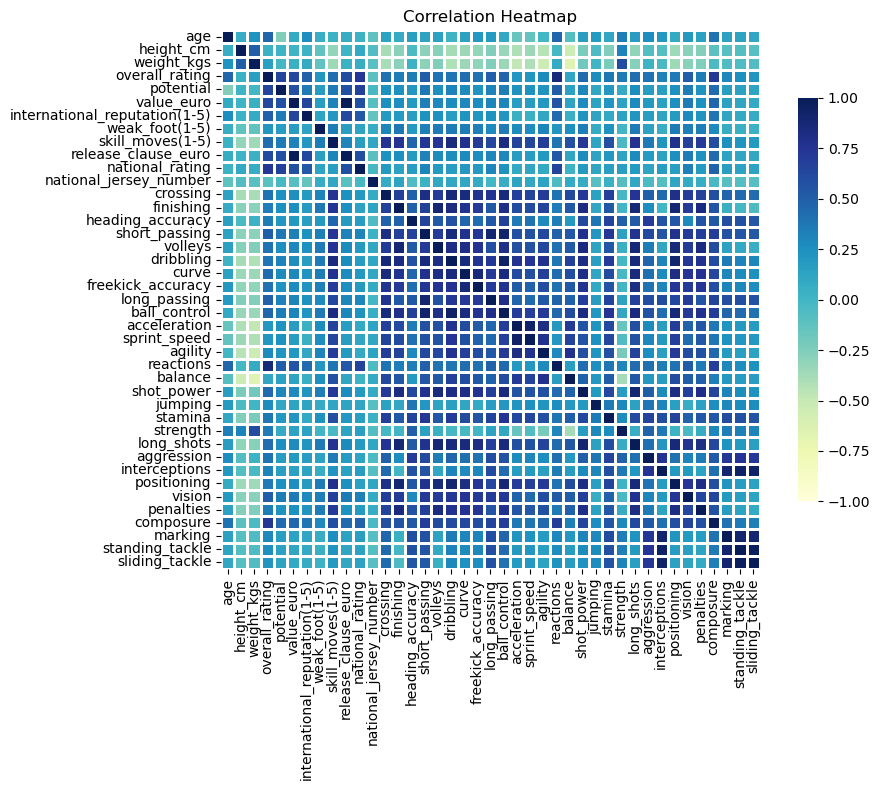

In [11]:
# Select the numeric columns from the DataFrame
numeric_df = df[numeric_columns]  # Subset of the DataFrame with numeric columns

# Calculate the correlation matrix for the numeric columns
corr_matrix = numeric_df.corr()

# Set up the figure size for better aesthetics
plt.figure(figsize=(10, 8))

# Create the heatmap with improved design
sns.heatmap(
    corr_matrix, 
    annot=False,        # Annotate cells with correlation values
    cmap='YlGnBu',     # Use a visually pleasing color palette
    vmin=-1, vmax=1,   # Ensure color scale matches the correlation range
    center=0,          # Set the center of the colormap at 0
    linewidths=1,      # Add lines between cells for better separation
    linecolor='white', # Color of the lines between cells
    square=True,       # Ensure the heatmap cells are square
    cbar_kws={'shrink': 0.75},  # Shrink the color bar for better alignment
)

# Add a title
plt.title('Correlation Heatmap', fontsize=12)

# Show the plot
plt.tight_layout()
plt.show()


### Key Findings of Bivariate & Multivariate Analysis:

1. **Linear Relationships**:
   - Some variables show a **positive linear relationship** with the target variable (likely wages or player value):
     - For instance, variables such as **overall rating**, **potential**, and **international reputation** seem to have a moderate to strong positive linear trend, indicating that as these variables increase, the target variable also increases.

2. **Exponential/Non-linear Relationships**:
   - A few relationships appear to have a **non-linear or exponential trend**. For example:
     - **Value in Euros** and **Wages** may show an exponential growth pattern, where higher wages tend to correspond with significantly higher player value, but this effect is less pronounced at the lower end of wages.
     - **Physical attributes** such as **stamina**, **strength**, and **jumping** seem to have weaker or less pronounced relationships with the target variable.

3. **Weak or No Relationship**:
   - Certain technical attributes like **crossing**, **finishing**, and **heading accuracy** show **no strong correlation** with the target variable. This could imply that these specific technical skills may not be the primary factors influencing the target outcome.
   
4. **Outliers**:
   - Many variables exhibit noticeable **outliers**, particularly at the higher end of the target variable's range. These could represent star players with disproportionately high wages or values, affecting the distribution and the overall trends of relationships.

5. **Clustering of Values**:
   - In some variables, especially for **attributes rated on a scale (e.g., international reputation or skill moves)**, there are visible clusters of data points. This suggests that players are often grouped into certain performance bands, with relatively fewer players at the extremes.

6. **Multicollinearity Possibility**:
   - From the scatter plots, it's possible that some predictors like **overall rating** and **potential** could be highly correlated with each other. Such multicollinearity could affect model performance and should be investigated further.
7. **Correlation Analysis**:
   - Attributes related to overall performance, such as overall rating, potential, and value in euros, show strong correlations with each other, which may be critical in predicting player wages or value.
   - Physical attributes show moderate relationships among themselves, while age negatively impacts certain physical traits.



# Data Preprocessing

## Data Cleaning

### Handle missing data

In [15]:
df.isnull().sum()

name                                 0
full_name                            0
birth_date                           0
age                                  0
height_cm                            0
weight_kgs                           0
positions                            0
nationality                          0
overall_rating                       0
potential                            0
value_euro                         255
wage_euro                          246
preferred_foot                       0
international_reputation(1-5)        0
weak_foot(1-5)                       0
skill_moves(1-5)                     0
body_type                            0
release_clause_euro               1837
national_team                    17097
national_rating                  17097
national_team_position           17097
national_jersey_number           17097
crossing                             0
finishing                            0
heading_accuracy                     0
short_passing            

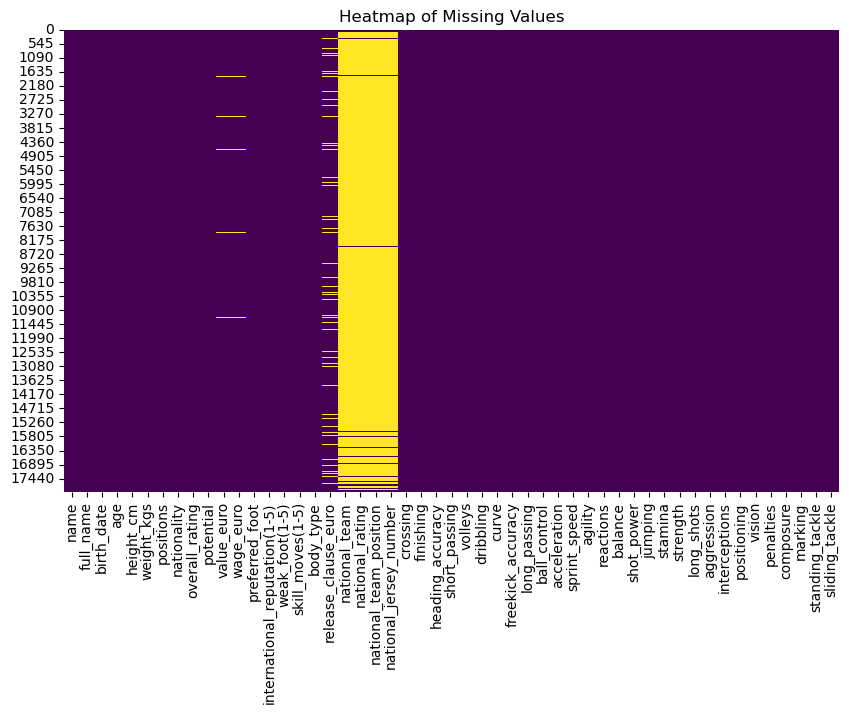

In [5]:
# Set up the matplotlib figure
plt.figure(figsize=(10, 6))

# Create a heatmap for missing values
sns.heatmap(df.isnull(), cmap="viridis", cbar=False)

# Add title for clarity
plt.title('Heatmap of Missing Values')

# Show the plot
plt.show()

In [6]:
# Drop variables with more than 95% missing values: national_team, national_rating, national_team_position, national_jersey_number

# List of columns to drop
columns_to_drop = ['national_team', 'national_rating', 'national_team_position', 'national_jersey_number','release_clause_euro']

# Drop the columns with more than 95% missing values
df_clean = df.drop(columns=columns_to_drop)

# Verify the columns are dropped
df_clean.head()


,name,full_name,birth_date,age,height_cm,weight_kgs,positions,nationality,overall_rating,potential,...,long_shots,aggression,interceptions,positioning,vision,penalties,composure,marking,standing_tackle,sliding_tackle
0,L. Messi,Lionel Andrés Messi Cuccittini,6/24/1987,31,170.18,72.1,"CF,RW,ST",Argentina,94,94,...,94,48,22,94,94,75,96,33,28,26
1,C. Eriksen,Christian Dannemann Eriksen,2/14/1992,27,154.94,76.2,"CAM,RM,CM",Denmark,88,89,...,89,46,56,84,91,67,88,59,57,22
2,P. Pogba,Paul Pogba,3/15/1993,25,190.50,83.9,"CM,CAM",France,88,91,...,82,78,64,82,88,82,87,63,67,67
3,L. Insigne,Lorenzo Insigne,6/4/1991,27,162.56,59.0,"LW,ST",Italy,88,88,...,84,34,26,83,87,61,83,51,24,22
4,K. Koulibaly,Kalidou Koulibaly,6/20/1991,27,187.96,88.9,CB,Senegal,88,91,...,15,87,88,24,49,33,80,91,88,87


Since wage_euro is the target variable that you're trying to predict (i.e., the dependent variable), it is essential that this column has no missing values when training the model. Plus, imputing (filling in) the missing target values with techniques like the mean, median, or some prediction can introduce noise and bias, which might reduce the accuracy of your model.

In [7]:
# Drop rows where 'wage_euro' is missing
df_clean = df_clean.dropna(subset=['wage_euro'])

# Verify that there are no missing values in 'wage_euro'
print(df_clean['wage_euro'].isnull().sum())  # Should print 0

0


In [8]:
df_clean = df_clean.drop(['name','full_name','birth_date','positions','nationality'], axis=1)

### Handling Outlier

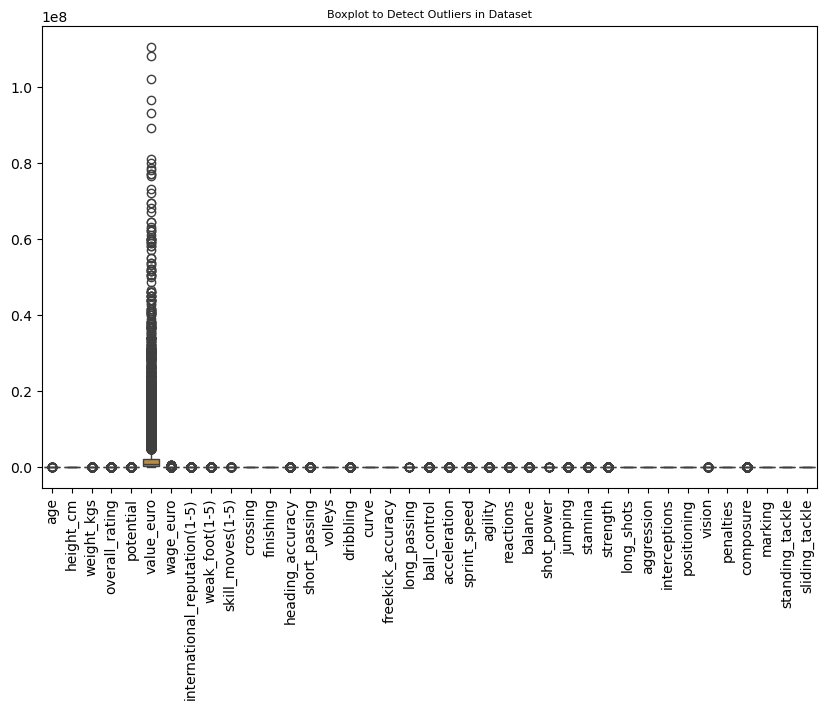

In [9]:
import seaborn as sns
import matplotlib.pyplot as plt

# Visualize outliers for each numeric column using a boxplot
plt.figure(figsize=(10, 6))
sns.boxplot(data=df_clean)
plt.title('Boxplot to Detect Outliers in Dataset', fontsize=8)
plt.xticks(rotation=90)
plt.show()


In [10]:
from scipy import stats
import numpy as np

# Calculate Z-scores for all numeric columns
z_scores = np.abs(stats.zscore(df.select_dtypes(include=np.number)))

# Identify outliers where Z-score is greater than 3
outliers = df_clean[(z_scores > 3).any(axis=1)]
print(outliers)

       age  height_cm  weight_kgs  overall_rating  potential   value_euro  \
0       31     170.18        72.1              94         94  110500000.0   
1       27     154.94        76.2              88         89   69500000.0   
2       25     190.50        83.9              88         91   73000000.0   
3       27     162.56        59.0              88         88   62000000.0   
4       27     187.96        88.9              88         91   60000000.0   
...    ...        ...         ...             ...        ...          ...   
17940   28     172.72        76.2              91         91   93000000.0   
17941   27     154.94        69.9              91         92  102000000.0   
17942   28     193.04        76.2              91         93   72000000.0   
17943   27     175.26        68.0              92         92  108000000.0   
17944   34     187.96        83.0              94         94   77000000.0   

       wage_euro preferred_foot  international_reputation(1-5)  \
0       5

C:\Users\votua\AppData\Local\Temp\ipykernel_17232\3923858164.py:8: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  outliers = df_clean[(z_scores > 3).any(axis=1)]


There are quite a lot of outlier in the dataset so that K-Nearest Neighbors (KNN) will be chosen as the approarch to handling outliers in order to preserve the overall structure of dataset. Because K-Nearest Neighbors (KNN) involves using KNN imputation to replace outlier values with more reasonable estimates based on the values of their nearest neighbors.

In [11]:
print(df_clean)

       age  height_cm  weight_kgs  overall_rating  potential   value_euro  \
0       31     170.18        72.1              94         94  110500000.0   
1       27     154.94        76.2              88         89   69500000.0   
2       25     190.50        83.9              88         91   73000000.0   
3       27     162.56        59.0              88         88   62000000.0   
4       27     187.96        88.9              88         91   60000000.0   
...    ...        ...         ...             ...        ...          ...   
17949   25     175.26        74.8              67         70     975000.0   
17950   23     182.88        79.8              59         67     190000.0   
17951   22     185.42        89.8              59         67     170000.0   
17952   21     175.26        64.9              59         71     280000.0   
17953   19     190.50        79.8              59         75     325000.0   

       wage_euro preferred_foot  international_reputation(1-5)  \
0       5

In [12]:
from sklearn.impute import KNNImputer
from sklearn.preprocessing import MinMaxScaler

# Step 1: Select only numeric columns for outlier detection and KNN Imputation
numeric_columns = df_clean.select_dtypes(include=['number']).copy()

# Step 2: Detect Outliers Using IQR (Interquartile Range) for numeric columns only
Q1 = numeric_columns.quantile(0.25)
Q3 = numeric_columns.quantile(0.75)
IQR = Q3 - Q1

# Step 3: Define outliers as values beyond 1.5*IQR from Q1 and Q3
outliers = (numeric_columns < (Q1 - 1.5 * IQR)) | (numeric_columns > (Q3 + 1.5 * IQR))

# Step 4: Replace only the outlier values with NaN (keeping the rest intact)
numeric_columns[outliers] = np.nan

print("Number of NaN values before KNN Imputation (after replacing outliers with NaN):")
print(numeric_columns.isnull().sum())

# Step 5: Initialize MinMaxScaler to scale the data for KNN
scaler = MinMaxScaler()

# Step 6: Scale the numeric columns before KNN Imputation
scaled_numeric_columns = pd.DataFrame(scaler.fit_transform(numeric_columns), columns=numeric_columns.columns)

# Step 7: Initialize KNNImputer
imputer = KNNImputer(n_neighbors=10)  # Increased neighbors from 5 to 10

# Step 8: Apply KNN Imputation to the scaled numeric columns
imputed_scaled_numeric_columns = pd.DataFrame(imputer.fit_transform(scaled_numeric_columns), columns=numeric_columns.columns)

# Step 9: Debugging Step - Check the imputed data before inverse scaling
print("Imputed data before inverse scaling (no NaNs should exist here):")
print(imputed_scaled_numeric_columns.isnull().sum())  # There should be no NaNs at this point

Number of NaN values before KNN Imputation (after replacing outliers with NaN):
age                                29
height_cm                           0
weight_kgs                        116
overall_rating                    162
potential                         163
value_euro                       2428
wage_euro                        2001
international_reputation(1-5)    1567
weak_foot(1-5)                   6665
skill_moves(1-5)                   51
crossing                            0
finishing                           0
heading_accuracy                 1024
short_passing                    1535
volleys                             0
dribbling                        1930
curve                               0
freekick_accuracy                   0
long_passing                       17
ball_control                     2033
acceleration                      503
sprint_speed                      724
agility                           202
reactions                         133
balance 

In [13]:
# Step 10: Inverse scaling with handling for potential issues
try:
    imputed_numeric_columns = pd.DataFrame(scaler.inverse_transform(imputed_scaled_numeric_columns), columns=numeric_columns.columns)
except ValueError as e:
    print("Error during inverse scaling:", e)
    # Handle potential scaling issues (outliers or extreme values)
    imputed_numeric_columns = imputed_scaled_numeric_columns  # If inverse scaling fails, keep imputed data as-is

# Step 11: Debugging Step - Check if NaNs reappear after inverse scaling
print("NaNs after inverse scaling:")
print(imputed_numeric_columns.isnull().sum())

NaNs after inverse scaling:
age                              0
height_cm                        0
weight_kgs                       0
overall_rating                   0
potential                        0
value_euro                       0
wage_euro                        0
international_reputation(1-5)    0
weak_foot(1-5)                   0
skill_moves(1-5)                 0
crossing                         0
finishing                        0
heading_accuracy                 0
short_passing                    0
volleys                          0
dribbling                        0
curve                            0
freekick_accuracy                0
long_passing                     0
ball_control                     0
acceleration                     0
sprint_speed                     0
agility                          0
reactions                        0
balance                          0
shot_power                       0
jumping                          0
stamina                    

In [14]:
# Step 10: Ensure index alignment between numeric and non-numeric columns
# Reset indices to ensure proper alignment for concatenation
imputed_numeric_columns.reset_index(drop=True, inplace=True)
non_numeric_columns = df_clean.select_dtypes(exclude=['number']).copy()
non_numeric_columns.reset_index(drop=True, inplace=True)

# Step 11: Combine imputed numeric columns with non-numeric columns
df_imputed = pd.concat([imputed_numeric_columns, non_numeric_columns], axis=1)

# Step 12: Check for NaN values in the final DataFrame
print("Remaining NaN values in the final DataFrame:")
print(df_imputed.isnull().sum())

Remaining NaN values in the final DataFrame:
age                              0
height_cm                        0
weight_kgs                       0
overall_rating                   0
potential                        0
value_euro                       0
wage_euro                        0
international_reputation(1-5)    0
weak_foot(1-5)                   0
skill_moves(1-5)                 0
crossing                         0
finishing                        0
heading_accuracy                 0
short_passing                    0
volleys                          0
dribbling                        0
curve                            0
freekick_accuracy                0
long_passing                     0
ball_control                     0
acceleration                     0
sprint_speed                     0
agility                          0
reactions                        0
balance                          0
shot_power                       0
jumping                          0
stamina   

## Analysis and Transformation Target Variable


 mu = 5405.43 and sigma = 5070.94



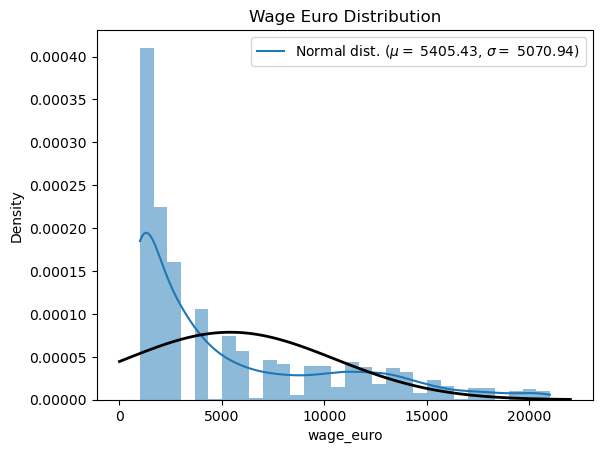

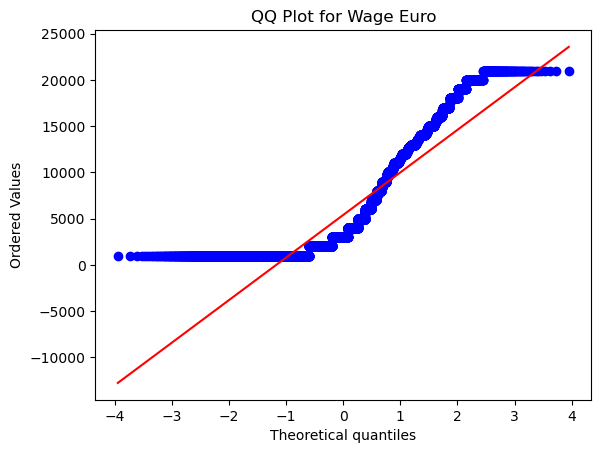

In [61]:
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import norm, probplot
import numpy as np

# Plot the distribution of 'wage_euro' with a fitted normal distribution curve
sns.histplot(df_imputed['wage_euro'], kde=True, stat="density", linewidth=0, bins=30)

# Fit the normal distribution to the data and get the parameters
(mu, sigma) = norm.fit(df_imputed['wage_euro'])
print(f'\n mu = {mu:.2f} and sigma = {sigma:.2f}\n')

# Plot the fitted normal distribution curve on top of the data
xmin, xmax = plt.xlim()  # Get current x-axis limits
x = np.linspace(xmin, xmax, 100)
p = norm.pdf(x, mu, sigma)
plt.plot(x, p, 'k', linewidth=2)

# Add labels and title
plt.legend([r'Normal dist. ($\mu=$ {:.2f}, $\sigma=$ {:.2f})'.format(mu, sigma)], loc='best')
plt.ylabel('Density')
plt.title('Wage Euro Distribution')

# Show the plot
plt.show()

# Now create a QQ-plot to check the normality of 'wage_euro'
fig = plt.figure()
res = probplot(df_imputed['wage_euro'], dist="norm", plot=plt)
plt.title('QQ Plot for Wage Euro')
plt.show()

The target variable is right skewed. As (linear) models love normally distributed data , let's try to transform this variable and make it more normally distributed.


 mu = 8.14 and sigma = 0.98



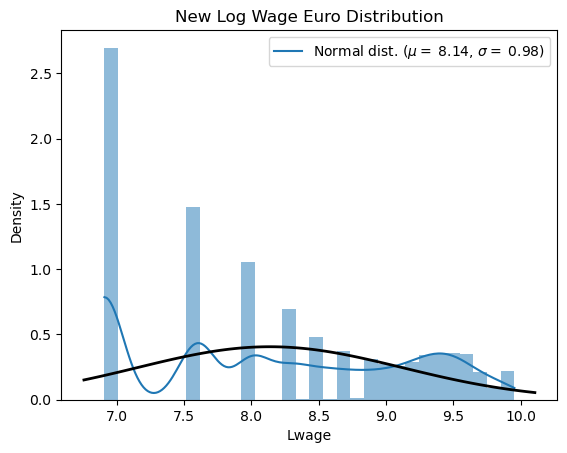

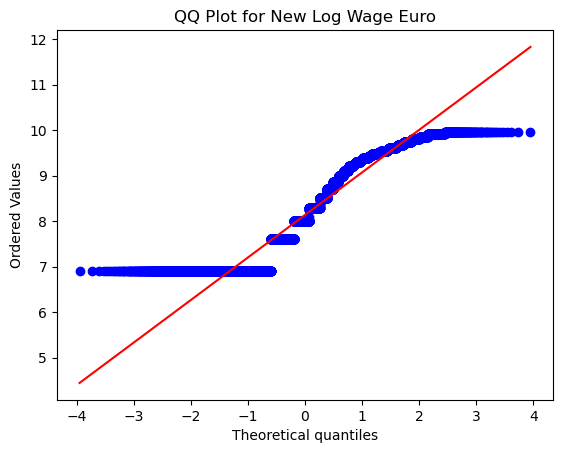

In [23]:
df_imputed['Lwage'] = np.log1p(df_imputed['wage_euro'])

# Check the new distribution after log transformation
sns.histplot(df_imputed['Lwage'], kde=True, stat="density", linewidth=0, bins=30)

# Fit the normal distribution to the data and get the parameters
(mu, sigma) = norm.fit(df_imputed['Lwage'])
print(f'\n mu = {mu:.2f} and sigma = {sigma:.2f}\n')

# Plot the fitted normal distribution curve on top of the data
xmin, xmax = plt.xlim()  # get current x-axis limits
x = np.linspace(xmin, xmax, 100)
p = norm.pdf(x, mu, sigma)
plt.plot(x, p, 'k', linewidth=2)

# Add labels and title
plt.legend([r'Normal dist. ($\mu=$ {:.2f}, $\sigma=$ {:.2f})'.format(mu, sigma)], loc='best')
plt.ylabel('Density')
plt.title('New Log Wage Euro Distribution')

# Show the plot
plt.show()

# Now create a QQ-plot to check the normality of 'Lwage' after log transformation
fig = plt.figure()
res = probplot(df_imputed['Lwage'], dist="norm", plot=plt)
plt.title('QQ Plot for New Log Wage Euro')
plt.show()

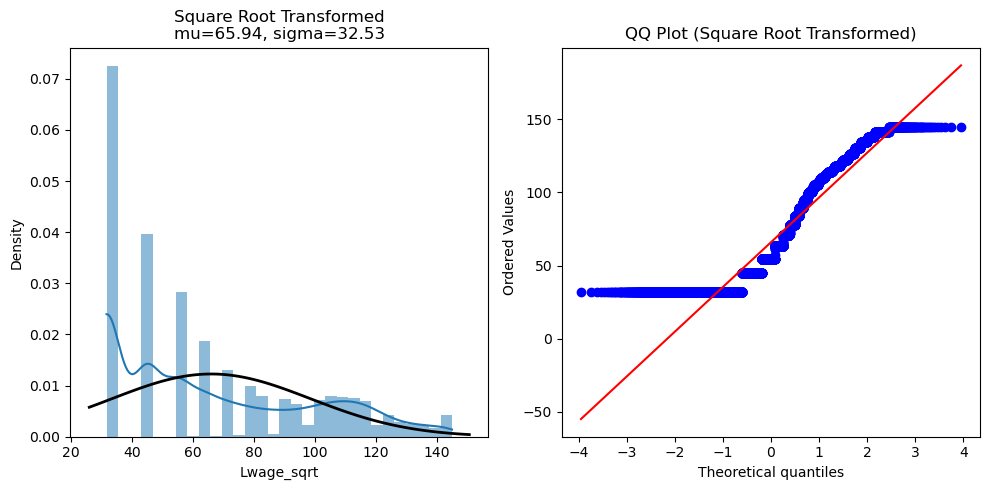

In [24]:
# Step 1: Square Root Transformation
df_imputed['Lwage_sqrt'] = np.sqrt(df_imputed['wage_euro'])

# Visualize the distribution for the square root transformation
plt.figure(figsize=(10, 5))

# Square root transformation distribution plot
plt.subplot(1, 2, 1)
sns.histplot(df_imputed['Lwage_sqrt'], kde=True, stat="density", linewidth=0, bins=30)
(mu_sqrt, sigma_sqrt) = norm.fit(df_imputed['Lwage_sqrt'])
plt.title(f'Square Root Transformed\nmu={mu_sqrt:.2f}, sigma={sigma_sqrt:.2f}')
plt.plot(np.linspace(*plt.xlim(), 100), norm.pdf(np.linspace(*plt.xlim(), 100), mu_sqrt, sigma_sqrt), 'k', lw=2)

# QQ plot for square root transformation
plt.subplot(1, 2, 2)
probplot(df_imputed['Lwage_sqrt'], dist="norm", plot=plt)
plt.title('QQ Plot (Square Root Transformed)')

plt.tight_layout()
plt.show()

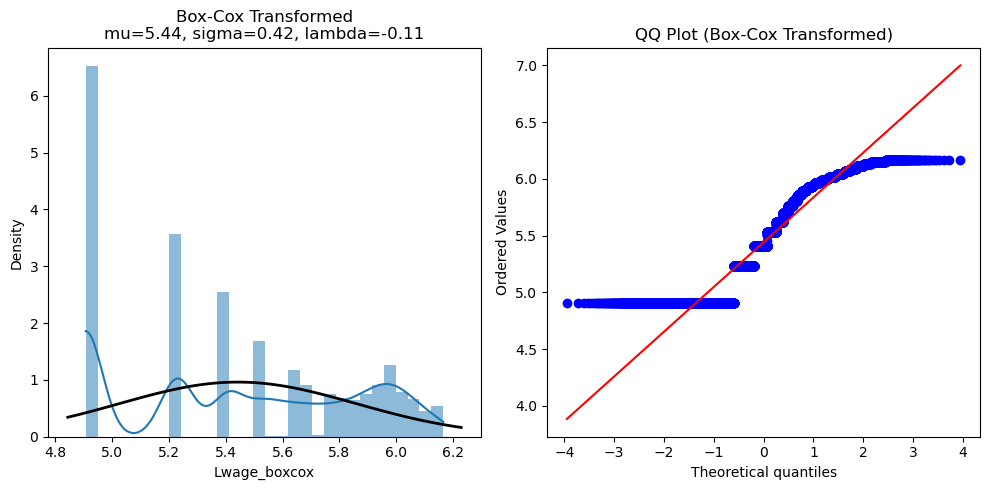

In [25]:
from scipy.stats import norm, probplot, boxcox

# Step 2: Box-Cox Transformation (only works for positive values)
df_imputed = df_imputed[df_imputed['wage_euro'] > 0]  # Box-Cox requires positive values
df_imputed['Lwage_boxcox'], lam = boxcox(df_imputed['wage_euro'])

# Visualize the distribution for the Box-Cox transformation
plt.figure(figsize=(10, 5))

# Box-Cox transformation distribution plot
plt.subplot(1, 2, 1)
sns.histplot(df_imputed['Lwage_boxcox'], kde=True, stat="density", linewidth=0, bins=30)
(mu_boxcox, sigma_boxcox) = norm.fit(df_imputed['Lwage_boxcox'])
plt.title(f'Box-Cox Transformed\nmu={mu_boxcox:.2f}, sigma={sigma_boxcox:.2f}, lambda={lam:.2f}')
plt.plot(np.linspace(*plt.xlim(), 100), norm.pdf(np.linspace(*plt.xlim(), 100), mu_boxcox, sigma_boxcox), 'k', lw=2)

# QQ plot for Box-Cox transformation
plt.subplot(1, 2, 2)
probplot(df_imputed['Lwage_boxcox'], dist="norm", plot=plt)
plt.title('QQ Plot (Box-Cox Transformed)')

plt.tight_layout()
plt.show()

Base on the first plot, the target variable (wage in euros) follows a distribution that is similar to an exponential distribution since it have many characteristics of exponential distribution:
Right-Skewed: The wage distribution shows a strong right skew, where the majority of the values are concentrated near the lower end, and there are fewer but larger values at the higher end. This is a common characteristic of an exponential distribution.

Heavy Tail: The tail of the distribution extends towards the higher wage values (e.g., wages above 10,000), with a gradual decline, which is also typical of an exponential distribution. In such distributions, extreme values occur but with decreasing frequency.

QQ Plot Analysis: In the QQ plot, if the distribution were normal, the points would closely follow the straight red line. However, in your case, the points deviate significantly from the line, confirming that the target variable does not follow a normal distribution. The sharp curve at the beginning indicates the presence of many low values, and the deviation at the higher end shows the presence of extreme wage values (a sign of an exponential or similarly skewed distribution).

Furthermore, regardless the effort of transformation deployed such as log, Box-Cox Transformation, Square Root Transformation the distrution not closer to nomarl distribution. Hence, the non-linear model such Random Forests, XGBoost, SVM, or Neural Networks could be consider to use in modelling stage since those model can handle non-normal and skewed distributions better.

In [26]:
df.describe()

,age,height_cm,weight_kgs,overall_rating,potential,value_euro,wage_euro,international_reputation(1-5),weak_foot(1-5),skill_moves(1-5),...,long_shots,aggression,interceptions,positioning,vision,penalties,composure,marking,standing_tackle,sliding_tackle
count,17954.000000,17954.000000,17954.000000,17954.000000,17954.000000,1.769900e+04,17708.000000,17954.000000,17954.000000,17954.000000,...,17954.000000,17954.000000,17954.000000,17954.000000,17954.000000,17954.000000,17954.000000,17954.000000,17954.000000,17954.000000
mean,25.565445,174.946921,75.301047,66.240169,71.430935,2.479280e+06,9902.134628,1.111674,2.945695,2.361034,...,46.852456,55.816531,46.657959,49.857302,53.406260,48.357302,58.680183,47.162861,47.733040,45.705915
std,4.705708,14.029449,7.083684,6.963730,6.131339,5.687014e+06,21995.593750,0.392168,0.663691,0.763223,...,19.429337,17.394047,20.754649,19.694311,14.156038,15.810844,11.625541,20.037346,21.674973,21.285812
min,17.000000,152.400000,49.900000,47.000000,48.000000,1.000000e+04,1000.000000,1.000000,1.000000,1.000000,...,3.000000,11.000000,3.000000,2.000000,10.000000,5.000000,12.000000,3.000000,2.000000,3.000000
25%,22.000000,154.940000,69.900000,62.000000,67.000000,3.250000e+05,1000.000000,1.000000,3.000000,2.000000,...,32.000000,44.000000,26.000000,38.000000,44.000000,38.000000,51.000000,30.000000,27.000000,24.000000
50%,25.000000,175.260000,74.800000,66.000000,71.000000,7.000000e+05,3000.000000,1.000000,3.000000,2.000000,...,51.000000,59.000000,52.000000,55.000000,55.000000,49.000000,60.000000,52.500000,55.000000,52.000000
75%,29.000000,185.420000,79.800000,71.000000,75.000000,2.100000e+06,9000.000000,1.000000,3.000000,3.000000,...,62.000000,69.000000,64.000000,64.000000,64.000000,60.000000,67.000000,64.000000,66.000000,64.000000
max,46.000000,205.740000,110.200000,94.000000,95.000000,1.105000e+08,565000.000000,5.000000,5.000000,5.000000,...,94.000000,95.000000,92.000000,95.000000,94.000000,92.000000,96.000000,94.000000,93.000000,90.000000


## Encoding the categorical data

In [16]:
categorical_columns = df_imputed.select_dtypes(include=['object']).columns

# Apply one-hot encoding using get_dummies
df_cleaned = pd.get_dummies(df_imputed, columns=categorical_columns, drop_first=False)

# Display the DataFrame with the encoded columns (should be 0 and 1)
print(df_cleaned.head())

    age  height_cm  weight_kgs  overall_rating  potential  value_euro  \
0  31.0     170.18        72.1            82.8       82.9   3470000.0   
1  27.0     154.94        76.2            80.4       82.3   3580000.0   
2  25.0     190.50        83.9            81.5       83.9   3450000.0   
3  27.0     162.56        59.0            81.2       82.4   3590000.0   
4  27.0     187.96        88.9            79.9       83.3   3620000.0   

   wage_euro  international_reputation(1-5)  weak_foot(1-5)  skill_moves(1-5)  \
0    13300.0                            1.0             3.0               4.0   
1    10300.0                            1.0             3.0               4.0   
2    11800.0                            1.0             3.0               3.6   
3    11400.0                            1.0             3.0               4.0   
4    14800.0                            1.0             3.0               2.0   

   ...  body_type_Akinfenwa  body_type_C. Ronaldo  body_type_Courtois  \
0

## Feature Scaling

In [17]:
df_cleaned_scaled = df_cleaned.copy()

In [18]:
from sklearn.preprocessing import StandardScaler

# Automatically select all numeric columns (integer and float) from the DataFrame
numeric_vars_cleaned = df_cleaned_scaled.select_dtypes(include=['int64', 'float64']).columns.tolist()

# Remove 'wage_euro' from the list of numeric columns to exclude it from scaling
if 'wage_euro' in numeric_vars_cleaned:
    numeric_vars_cleaned.remove('wage_euro')

# Initialize the StandardScaler
scaler = StandardScaler()

# Fit the scaler to the feature matrix and transform the data (excluding 'wage_euro')
df_cleaned_scaled[numeric_vars_cleaned] = scaler.fit_transform(df_cleaned_scaled[numeric_vars_cleaned])

# Check the DataFrame after scaling
print(df_cleaned_scaled.head())

        age  height_cm  weight_kgs  overall_rating  potential  value_euro  \
0  1.171585  -0.338424   -0.455249        2.426800   1.923559    1.762216   
1  0.315812  -1.424113    0.139158        2.076016   1.823132    1.850214   
2 -0.112075   1.109160    1.255482        2.236792   2.090937    1.746216   
3  0.315812  -0.881269   -2.354450        2.192944   1.839870    1.858214   
4  0.315812   0.928212    1.980368        2.002936   1.990510    1.882214   

   wage_euro  international_reputation(1-5)  weak_foot(1-5)  skill_moves(1-5)  \
0    13300.0                            0.0             0.0          2.179185   
1    10300.0                            0.0             0.0          2.179185   
2    11800.0                            0.0             0.0          1.648171   
3    11400.0                            0.0             0.0          2.179185   
4    14800.0                            0.0             0.0         -0.475882   

   ...  body_type_Akinfenwa  body_type_C. Ronaldo 

In [19]:
bool_cols = df_cleaned_scaled.select_dtypes(include=['bool']).columns

# Convert only the boolean columns from True/False to 1/0
df_cleaned_scaled[bool_cols] = df_cleaned_scaled[bool_cols].astype(int)

# Check the DataFrame after conversion
print(df_cleaned_scaled.head())

        age  height_cm  weight_kgs  overall_rating  potential  value_euro  \
0  1.171585  -0.338424   -0.455249        2.426800   1.923559    1.762216   
1  0.315812  -1.424113    0.139158        2.076016   1.823132    1.850214   
2 -0.112075   1.109160    1.255482        2.236792   2.090937    1.746216   
3  0.315812  -0.881269   -2.354450        2.192944   1.839870    1.858214   
4  0.315812   0.928212    1.980368        2.002936   1.990510    1.882214   

   wage_euro  international_reputation(1-5)  weak_foot(1-5)  skill_moves(1-5)  \
0    13300.0                            0.0             0.0          2.179185   
1    10300.0                            0.0             0.0          2.179185   
2    11800.0                            0.0             0.0          1.648171   
3    11400.0                            0.0             0.0          2.179185   
4    14800.0                            0.0             0.0         -0.475882   

   ...  body_type_Akinfenwa  body_type_C. Ronaldo 

## Splitting the Dataset into the training Set and Test set

In [20]:
X= df_cleaned_scaled.drop(['wage_euro'], axis=1)
y= df_cleaned_scaled['wage_euro']

In [21]:
from sklearn.model_selection import train_test_split

# Split the features and target variable into 'data' and 'test' sets with an 80-20 ratio
X_data, X_test, y_data, y_test = train_test_split(
    X,
    y,
    test_size=0.2,    # 20% for the test set
    random_state=42,  # Ensuring reproducibility of results
)

# Further split the 'data' set into 'training' and 'validation' sets with an 80-20 ratio
X_train, X_val, y_train, y_val = train_test_split(
    X_data,
    y_data,
    test_size=0.2,    # 20% of the 'data' set for the validation set
    random_state=42,  # Ensuring reproducibility of results
)

## Feature Selection

### Feature Importance using Wrapper Method

In [68]:
from sklearn.feature_selection import SelectFromModel
from sklearn.ensemble import RandomForestRegressor as rf  # If predicting wages

# Initialize the Random Forest model
model = rf(n_estimators=100, random_state=0)

# Feature selection
selector = SelectFromModel(model)

# Fit the selector to the training data
selector.fit(X_train, y_train)

# Get selected features
support = selector.get_support()
selected_features = X_train.loc[:, support].columns.tolist()

# Output selected features
print("Selected Features: ", selected_features)

# Train the model and get feature importances
model.fit(X_train, y_train)
feature_importances = model.feature_importances_

# Print feature importance scores
print("Feature Importances: ", feature_importances)


Selected Features:  ['overall_rating', 'value_euro']
Feature Importances:  [9.36537370e-03 6.90910045e-03 1.12204029e-02 6.05566562e-01
 7.99633585e-03 4.44419586e-02 0.00000000e+00 0.00000000e+00
 1.45983665e-03 1.15382338e-02 9.36773317e-03 1.12725722e-02
 9.22042602e-03 9.64079296e-03 9.89847109e-03 1.01835989e-02
 1.02560398e-02 9.17073749e-03 1.01391438e-02 9.37483806e-03
 1.08540855e-02 1.20124023e-02 1.00270227e-02 1.23359347e-02
 1.10402404e-02 1.24599455e-02 1.23291124e-02 1.05081512e-02
 9.47078359e-03 1.23505566e-02 9.73069052e-03 8.76476937e-03
 1.01469496e-02 1.20627908e-02 1.13093324e-02 1.16127259e-02
 1.01485767e-02 1.08475472e-02 8.41264899e-04 7.74625322e-04
 0.00000000e+00 4.62383779e-09 1.04541229e-08 1.36793512e-03
 0.00000000e+00 3.07002143e-09 1.19210892e-03 0.00000000e+00
 0.00000000e+00 7.90272633e-04]


### Forward Selection Method

In [67]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

def forward_selection(X_train, y_train, X_val, y_val, model=LinearRegression(), scoring=mean_squared_error):
    """
    Perform forward feature selection using pre-split training and validation sets.
    
    Parameters:
    - X_train: Training dataset features (pd.DataFrame).
    - y_train: Training dataset target (pd.Series or np.array).
    - X_val: Validation dataset features (pd.DataFrame).
    - y_val: Validation dataset target (pd.Series or np.array).
    - model: A machine learning model (default is LinearRegression).
    - scoring: Scoring function (default is mean_squared_error).
    
    Returns:
    - best_features: List of selected features.
    """
    selected_features = []
    remaining_features = list(X_train.columns)
    best_score = float('inf')  # Start with an infinite score (since we're minimizing MSE)
    
    while remaining_features:
        scores_with_candidates = []
        
        for candidate in remaining_features:
            # Test the model with current selected features + this candidate
            features_to_test = selected_features + [candidate]
            
            # Train the model
            model.fit(X_train[features_to_test], y_train)
            y_pred = model.predict(X_val[features_to_test])
            
            # Calculate the score using validation data
            score = scoring(y_val, y_pred)
            scores_with_candidates.append((score, candidate))
        
        # Sort the scores to find the feature that gives the best score
        scores_with_candidates.sort()  # Sort in ascending order by score
        best_candidate_score, best_candidate = scores_with_candidates[0]
        
        # If the new score is better, add the feature, otherwise stop
        if best_candidate_score < best_score:
            best_score = best_candidate_score
            selected_features.append(best_candidate)
            remaining_features.remove(best_candidate)
            print(f"Selected {best_candidate} with score {best_candidate_score}")
        else:
            break  # Stop when no further improvement is made
    
    return selected_features


selected_features = forward_selection(X_train, y_train, X_val, y_val)

# Output the selected features
print("Selected Features: ", selected_features)


Selected value_euro with score 11075726.714623012
Selected overall_rating with score 10352806.194271207
Selected age with score 10239755.977378674
Selected potential with score 10185264.282262465
Selected heading_accuracy with score 10137443.117132958
Selected stamina with score 10082172.02016489
Selected ball_control with score 10070855.32930358
Selected acceleration with score 10049336.911686663
Selected dribbling with score 10042711.325003488
Selected jumping with score 10035546.40995465
Selected long_passing with score 10030675.994643018
Selected sliding_tackle with score 10015602.279922558
Selected marking with score 10009082.916634433
Selected penalties with score 10003929.793773716
Selected aggression with score 10001242.996333048
Selected preferred_foot_Left with score 9998401.545629742
Selected height_cm with score 9996265.192751458
Selected freekick_accuracy with score 9994781.24101671
Selected skill_moves(1-5) with score 9993829.923635338
Selected body_type_Normal with score

In [55]:
selected_features= ['value_euro', 'overall_rating', 'age', 'potential', 'heading_accuracy', 'stamina', 'ball_control', 'acceleration', 'dribbling', 'jumping', 'long_passing', 'sliding_tackle', 'marking', 'penalties', 'aggression', 'preferred_foot_Left', 'height_cm', 'freekick_accuracy', 'skill_moves(1-5)', 'body_type_Normal', 'weight_kgs', 'strength', 'positioning', 'finishing', 'vision', 'body_type_C. Ronaldo', 'body_type_Courtois', 'body_type_Neymar', 'body_type_Akinfenwa']
# Keep the Selected Features to train the model
X_test = X_test[selected_features]

X_train = X_train[selected_features]

X_val = X_val[selected_features]

# Modelling

## Random Forest 

In [23]:
from sklearn.svm import SVR
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import KFold, cross_val_score, train_test_split
from sklearn.metrics import mean_squared_error

In [56]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score
import numpy as np

# Initialize the Random Forest model
rf_base_model = RandomForestRegressor(random_state=42)

# Train the base model on the training data
rf_base_model = rf_base_model.fit(X_train, y_train)

# Predict on the validation data for both models
y_pred_base = rf_base_model.predict(X_val)

# Calculate RMSE (Root Mean Squared Error)
rmse_base_model = np.sqrt(mean_squared_error(y_val, y_pred_base))

# Calculate R-squared
r2_base_model = r2_score(y_val, y_pred_base)

# Output the evaluation metrics
print(f"RMSE of Base Model: {rmse_base_model}")
print(f"R-squared of Base Model: {r2_base_model}")


RMSE of Base Model: 3073.483238331071
R-squared of Base Model: 0.6447618797009573


In [57]:
from pprint import pprint
# Look at parameters used by our current forest
print('Parameters currently in use:\n')
pprint(rf_base_model.get_params())

Parameters currently in use:

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'criterion': 'squared_error',
 'max_depth': None,
 'max_features': 1.0,
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'monotonic_cst': None,
 'n_estimators': 100,
 'n_jobs': None,
 'oob_score': False,
 'random_state': 42,
 'verbose': 0,
 'warm_start': False}


In [64]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import GridSearchCV

# Create the parameter grid based on the results of random search 
param_grid = {'bootstrap': [True, False],
 'max_depth': [10, 20, 30, 40],
 'max_features': ['auto', 'sqrt'],
 'min_samples_leaf': [1, 2, 4],
 'min_samples_split': [2, 5, 10],
 'n_estimators': [100, 200, 300]}

# Initialize the RandomForestRegressor model
model = RandomForestRegressor()

# Set up the grid search with cross-validation (using RMSE as the scoring metric)
rf_grid_search = GridSearchCV(model, param_grid, cv=3, scoring='neg_mean_squared_error', n_jobs = -1)

# Fit the grid search to the training data
rf_grid_search.fit(X_train, y_train)

# Print the best parameters and the corresponding score
print("Best parameters:", rf_grid_search.best_params_)
print("Best cross-validated score (neg. MSE):", rf_grid_search.best_score_)

# To convert the negative MSE into positive RMSE:
best_rmse = np.sqrt(-rf_grid_search.best_score_)
print(f"Best cross-validated RMSE: {best_rmse}")


c:\Users\votua\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py:547: FitFailedWarning: 
648 fits failed out of a total of 1296.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
221 fits failed with the following error:
Traceback (most recent call last):
  File "c:\Users\votua\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py", line 895, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "c:\Users\votua\anaconda3\Lib\site-packages\sklearn\base.py", line 1467, in wrapper
    estimator._validate_params()
  File "c:\Users\votua\anaconda3\Lib\site-packages\sklearn\base.py", line 666, in _validate_params
    validate_parameter_constraints(
  File "c:\Users\votua\anaconda3\Lib\site-packa

Best parameters: {'bootstrap': True, 'max_depth': 20, 'max_features': 'sqrt', 'min_samples_leaf': 4, 'min_samples_split': 2, 'n_estimators': 300}
Best cross-validated score (neg. MSE): -9078108.28575676
Best cross-validated RMSE: 3012.989924602596


In [65]:
# Get the best model from the GridSearchCV (trained with the best parameters)
rf_best_model = rf_grid_search.best_estimator_

# Predict on the validation data using the best model from GridSearchCV
y_pred_best_model = rf_best_model.predict(X_val)

# Calculate RMSE (Root Mean Squared Error) for the predictions
rmse_best_model = np.sqrt(mean_squared_error(y_val, y_pred_best_model))

# Calculate R-squared for the predictions
r2_best_model = r2_score(y_val, y_pred_best_model)

# Output the evaluation metrics
print(f"RMSE of Best Model on Full Features: {rmse_best_model}")
print(f"R-squared of Best Model on Full Features: {r2_best_model}")


RMSE of Best Model on Full Features: 3038.926850864675
R-squared of Best Model on Full Features: 0.652705137982996


## Support Vector Regression

In [66]:
from sklearn.svm import SVR
from sklearn.metrics import mean_squared_error, r2_score
import numpy as np

# Initialize the Support Vector Regressor with the RBF kernel
svr_base_model = SVR(kernel='rbf')

# Train the SVR model on the training data
svr_base_model.fit(X_train, y_train)

# Make predictions on the validation set
y_pred = svr_base_model.predict(X_val)

# Calculate RMSE using the validation target values (y_val)
rmse = np.sqrt(mean_squared_error(y_val, y_pred))

# Calculate R-squared using the validation target values (y_val)
r2 = r2_score(y_val, y_pred)

# Output the evaluation metrics
print(f"RMSE: {rmse}")
print(f"R-squared: {r2}")


RMSE: 5293.539490449121
R-squared: -0.053780554056930496


In [67]:
from sklearn.svm import SVR
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import mean_squared_error, r2_score
import numpy as np

# Define the parameter grid for hyperparameter tuning, including different kernels
param_grid = {
    'C': [0.1, 1, 10, 100],
    'epsilon': [0.1, 0.2, 0.5],
    'kernel': ['poly', 'rbf', 'sigmoid'],  
    'gamma': ['scale', 'auto'],                     
    'degree': [2, 3, 4]                              
}

# Initialize the SVR model
svr_model = SVR()

# Initialize GridSearchCV with the SVR model and parameter grid
grid_search = GridSearchCV(estimator=svr_model, param_grid=param_grid, 
                           scoring='neg_mean_squared_error', cv=5, verbose=2, n_jobs=-1)

# Fit the grid search to the data
grid_search.fit(X_train, y_train)

# Get the best model from the grid search
best_svr_model = grid_search.best_estimator_

# Make predictions using the best model on the validation data
y_pred = best_svr_model.predict(X_val)

# Calculate RMSE using the validation target values (y_val)
rmse = np.sqrt(mean_squared_error(y_val, y_pred))

# Calculate R-squared using the validation target values (y_val)
r2 = r2_score(y_val, y_pred)

# Output the evaluation metrics and best hyperparameters
print(f"Best Hyperparameters: {grid_search.best_params_}")
print(f"RMSE: {rmse}")
print(f"R-squared: {r2}")


Fitting 5 folds for each of 216 candidates, totalling 1080 fits
Best Hyperparameters: {'C': 100, 'degree': 2, 'epsilon': 0.5, 'gamma': 'auto', 'kernel': 'rbf'}
RMSE: 3181.1633058025313
R-squared: 0.6194341678433657


# Model Evaluation

In [80]:
from sklearn.metrics import mean_squared_error, r2_score
import numpy as np

# Function to evaluate the model's performance
def evaluate(model, test_features, test_labels):
    predictions = model.predict(test_features)
    rmse = np.sqrt(mean_squared_error(test_labels, predictions))
    r2 = r2_score(test_labels, predictions)
    
    print('Model Performance')
    print('RMSE: {:0.4f}'.format(rmse))
    print('R-squared: {:0.4f}'.format(r2))
    
    return rmse, r2

# Evaluate the base model (trained on full features)
print("Evaluating Base Model:")
rmse_base, r2_base = evaluate(rf_base_model, X_test, y_test)


# Evaluate the best model from grid search (tuned model)
print("\nEvaluating Best Model (Grid Search Tuned):")
rf_rmse_best, rf_r2_best = evaluate(rf_best_model, X_test, y_test)

# Improvement comparisons
print("\nImprovement Comparisons:")
print('Improvement of Best Model over Base Model: {:0.2f}%'.format(100 * (rmse_base - rf_rmse_best) / rmse_base))


Evaluating Base Model:
Model Performance
RMSE: 2975.2898
R-squared: 0.6544

Evaluating Best Model (Grid Search Tuned):
Model Performance
RMSE: 2956.0404
R-squared: 0.6588

Improvement Comparisons:
Improvement of Best Model over Base Model: 0.65%


In [85]:
from sklearn.metrics import mean_squared_error, r2_score
import numpy as np

# Function to evaluate the model's performance and return RMSE and R-squared
def evaluate(model, test_features, test_labels):
    predictions = model.predict(test_features)
    rmse = np.sqrt(mean_squared_error(test_labels, predictions))
    r2 = r2_score(test_labels, predictions)
    
    print('Model Performance')
    print('RMSE: {:0.4f}'.format(rmse))
    print('R-squared: {:0.4f}'.format(r2))
    
    return rmse, r2


# Evaluate the base SVR model (trained on full features)
print("Evaluating Base Model:")
rmse_base, r2_base = evaluate(svr_base_model, X_test, y_test)

# Evaluate the best SVR model from grid search (tuned model)
print("\nEvaluating Best Model (Grid Search Tuned):")
svr_rmse_best, svr_r2_best = evaluate(best_svr_model, X_test, y_test)

# Improvement comparisons
print("\nImprovement Comparisons:")
print('Improvement of Best Model over Base Model (RMSE): {:0.2f}%'.format(100 * (rmse_base - svr_rmse_best) / rmse_base))


Evaluating Base Model:
Model Performance
RMSE: 5158.8708
R-squared: -0.0392

Evaluating Best Model (Grid Search Tuned):
Model Performance
RMSE: 3099.5419
R-squared: 0.6249

Improvement Comparisons:
Improvement of Best Model over Base Model (RMSE): 39.92%


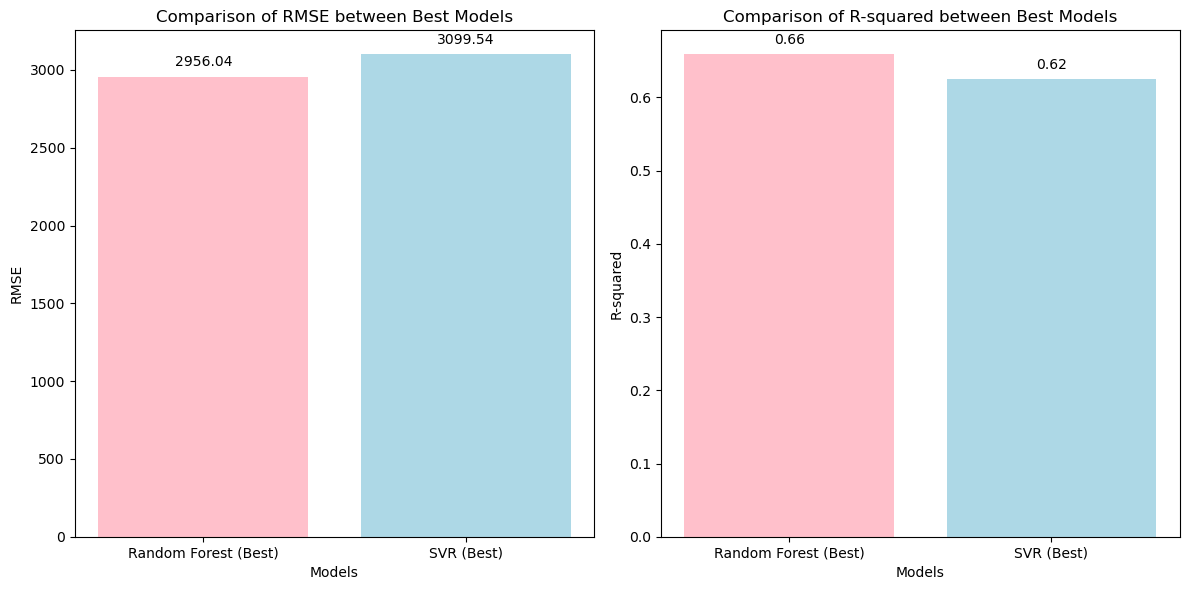

In [84]:
# Labels for the models
models = ['Random Forest (Best)', 'SVR (Best)']

# RMSE values for each model
rmse_values = [rf_rmse_best, svr_rmse_best]

# R-squared values for each model
r2_values = [rf_r2_best, svr_r2_best]

# Create a figure with two subplots (one for RMSE and one for R-squared)
fig, ax = plt.subplots(1, 2, figsize=(12, 6))

# Bar chart for RMSE
bars_rmse=ax[0].bar(models, rmse_values, color=['pink', 'lightblue'])
ax[0].set_title('Comparison of RMSE between Best Models')
ax[0].set_xlabel('Models')
ax[0].set_ylabel('RMSE')

# Add RMSE values on top of the bars
for bar in bars_rmse:
    yval = bar.get_height()
    ax[0].text(bar.get_x() + bar.get_width()/2, yval + 50, round(yval, 2), ha='center', va='bottom')

# Bar chart for R-squared
bars_r2=ax[1].bar(models, r2_values, color=['pink', 'lightblue'])
ax[1].set_title('Comparison of R-squared between Best Models')
ax[1].set_xlabel('Models')
ax[1].set_ylabel('R-squared')

# Add R-squared values on top of the bars
for bar in bars_r2:
    yval = bar.get_height()
    ax[1].text(bar.get_x() + bar.get_width()/2, yval + 0.01, round(yval, 2), ha='center', va='bottom')

# Display the charts
plt.tight_layout()
plt.show()

# Conclusion
Key Results and Comparisons
Random Forest Regressor (RF):

Base Model Performance: RMSE of 2975.2898 and R² of 0.6544.
Tuned Model Performance: RMSE improved to 2956.0404 (a modest 0.65% improvement) and R² increased to 0.6588.
The base Random Forest model was already well-optimized, and further tuning only marginally improved its performance.
Support Vector Regression (SVR):

Base Model Performance: RMSE of 5158.8708 and R² of -0.0392 (indicating poor performance).
Tuned Model Performance: RMSE improved dramatically to 3099.5419 (a 39.92% improvement) and R² increased to 0.6249.
While the SVR model showed significant improvement post-tuning, it still underperformed compared to the Random Forest model on the test set.

Despite the notable improvement of the SVR model after tuning, the Random Forest Regressor consistently outperformed it in terms of both RMSE and R-squared. The tuned Random Forest model achieved an RMSE of 2956.0404 and an R² of 0.6588, compared to SVR's RMSE of 3099.5419 and R² of 0.6249. Therefore, the Random Forest Regressor is recommended as the best-performing model for predicting football player wages.